# Game Recommendation System 


In this project i will be exploring and creating a game recommandation system using Pandas. I wont be doing a lot of data exploration or visualisations, The data is not clunky or has lots of missing data its ready to be manipulated.i got this dataset from https://kaggle.com titled vgsales

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vgsales = pd.read_csv('vgsales.csv')

In [3]:
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


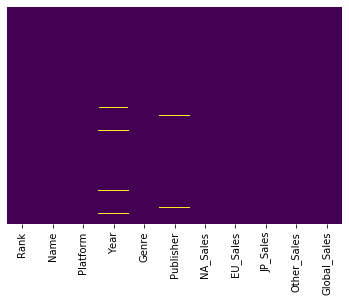

In [5]:
sns.heatmap(vgsales.isnull(), yticklabels=False, cbar= False, cmap= 'viridis')

In [6]:
vgsales.loc[vgsales['Year'].isnull()].tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.0,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.0,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.0,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.0,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.0,0.0,0.01


In [7]:
vgsales.loc[vgsales['Genre']== 'Action']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [8]:
vgsales['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

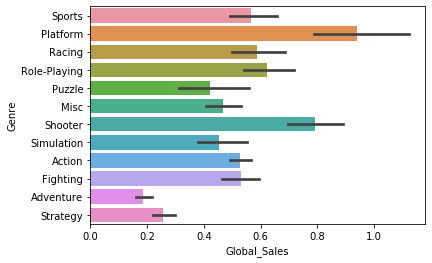

In [9]:
sns.barplot(x = vgsales['Global_Sales'], y = vgsales['Genre'], data = vgsales)

In [10]:
rank = pd.DataFrame(vgsales['Name'])

In [11]:
rank.head()

,Name
0,Wii Sports
1,Super Mario Bros.
2,Mario Kart Wii
3,Wii Sports Resort
4,Pokemon Red/Pokemon Blue


In [12]:
rank = rank.join(vgsales['Genre'])

In [13]:
rank.head()

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing


In [14]:
rank.sort_values('Genre', ascending = True).head(10)

,Name,Genre
8298,The Lord of the Rings: Aragorn's Quest,Action
11584,Legend of the Guardians: The Owls of Ga'Hoole,Action
11592,Samurai Warriors 2,Action
4138,Up,Action
4133,Tomb Raider: Underworld,Action
4132,Dynasty Warriors Gundam,Action
4128,FlingSmash,Action
4147,Double Dragon,Action
4127,Nickelodeon Team Umizoomi,Action
11616,Auto Destruct,Action


The recommandation will be based on numerical data, Genre plays a major factor on recommanding a game to a user 
since its difficult to work with catogorical data with strings i will create a Dictionary that will map a genre string to an integer. and create a separate colunm called 'Genre_Class'

In [22]:
genre_map = {'Action':1,'Sports':2,'Misc':3,'Role-Playing':4,
             'Shooter':5,'Adventure':6,'Racing':7,'Platform':8,
            'Simulation':9,'Fighting':10,'Strategy':11,'Puzzle':12}

In [23]:
vgsales['Genre_Class'] = vgsales['Genre'].map(genre_map)

In [24]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Class
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,7
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,4


In [19]:
rank = rank.join(vgsales['Genre_Class'])

In [20]:
rank.head()

,Name,Genre,Genre_Class
0,Wii Sports,Sports,2
1,Super Mario Bros.,Platform,8
2,Mario Kart Wii,Racing,7
3,Wii Sports Resort,Sports,2
4,Pokemon Red/Pokemon Blue,Role-Playing,4


In [21]:
rank.sort_values('Name', ascending = True).head(10)

,Name,Genre,Genre_Class
4754,'98 Koshien,Sports,2
8357,.hack//G.U. Vol.1//Rebirth,Role-Playing,4
7107,.hack//G.U. Vol.2//Reminisce,Role-Playing,4
8602,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,4
8304,.hack//G.U. Vol.3//Redemption,Role-Playing,4
1563,.hack//Infection Part 1,Role-Playing,4
9074,.hack//Link,Role-Playing,4
3002,.hack//Mutation Part 2,Role-Playing,4
4294,.hack//Outbreak Part 3,Role-Playing,4
8007,.hack//Quarantine Part 4: The Final Chapter,Role-Playing,4


In [22]:
gamescol = vgsales.pivot_table( columns='Name')

In [23]:
gamescol

Name,'98 Koshien,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol.2//Reminisce,.hack//G.U. Vol.2//Reminisce (jp sales),.hack//G.U. Vol.3//Redemption,.hack//Infection Part 1,.hack//Link,.hack//Mutation Part 2,.hack//Outbreak Part 3,.hack//Quarantine Part 4: The Final Chapter,...,nail'd,pro evolution soccer 2011,th!nk Logic Trainer,thinkSMART,thinkSMART FAMILY!,thinkSMART: Chess for Kids,uDraw Studio,uDraw Studio: Instant Artist,wwe Smackdown vs. Raw 2006,¡Shin Chan Flipa en colores!
EU_Sales,0.10,0.00,0.09,0.00,0.00,0.38,0.00,0.18,0.11,0.07,...,0.020,0.380000,0.00,0.00,0.00,0.00,0.58,0.050,1.02,0.00
Genre_Class,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,7.000,2.000000,12.00,3.00,3.00,3.00,3.00,3.000,10.00,8.00
Global_Sales,0.41,0.17,0.23,0.16,0.17,1.27,0.14,0.68,0.46,0.18,...,0.110,0.753333,0.01,0.10,0.03,0.01,2.46,0.105,3.00,0.14
JP_Sales,0.12,0.17,0.00,0.16,0.17,0.26,0.14,0.20,0.17,0.00,...,0.000,0.151667,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.14
NA_Sales,0.15,0.00,0.11,0.00,0.00,0.49,0.00,0.23,0.14,0.09,...,0.080,0.091667,0.01,0.09,0.03,0.01,1.67,0.045,1.57,0.00
Other_Sales,0.03,0.00,0.03,0.00,0.00,0.13,0.00,0.06,0.04,0.02,...,0.015,0.130000,0.00,0.01,0.00,0.00,0.20,0.010,0.41,0.00
Rank,4756.00,8359.00,7109.00,8604.00,8306.00,1565.00,9076.00,3004.00,4296.00,8009.00,...,10240.500,5154.333333,16420.00,10798.00,14387.00,16417.00,628.00,11681.500,471.00,9137.00
Year,1998.00,2006.00,2006.00,2006.00,2007.00,2002.00,2010.00,2002.00,2002.00,2003.00,...,2010.000,2010.000000,2009.00,2010.00,2010.00,2011.00,2010.00,2011.000,NaN,2007.00


In [ ]:
INSERT 'wwe Smackdown vs. Raw 2006'

In [24]:
wwe_genre = gamescol['wwe Smackdown vs. Raw 2006']

In [47]:
wwe_genre

EU_Sales          1.02
Genre_Class      10.00
Global_Sales      3.00
JP_Sales          0.00
NA_Sales          1.57
Other_Sales       0.41
Rank            471.00
Year               NaN
Name: wwe Smackdown vs. Raw 2006, dtype: float64

In [26]:
similar_to_wwe = gamescol.corrwith(wwe_genre)

In [27]:
similar_to_wwe

Name
'98 Koshien                                0.999821
.hack//G.U. Vol.1//Rebirth                 0.999822
.hack//G.U. Vol.2//Reminisce               0.999824
.hack//G.U. Vol.2//Reminisce (jp sales)    0.999822
.hack//G.U. Vol.3//Redemption              0.999822
                                             ...   
thinkSMART: Chess for Kids                 0.999817
uDraw Studio                               0.999880
uDraw Studio: Instant Artist               0.999819
wwe Smackdown vs. Raw 2006                 1.000000
¡Shin Chan Flipa en colores!               0.999829
Length: 11493, dtype: float64

In [28]:
corr_wwe = pd.DataFrame(similar_to_wwe, columns=['correlation'])

In [29]:
corr_wwe.dropna(inplace=True)

In [30]:
corr_wwe.head()

,correlation
Name,
'98 Koshien,0.999821
.hack//G.U. Vol.1//Rebirth,0.999822
.hack//G.U. Vol.2//Reminisce,0.999824
.hack//G.U. Vol.2//Reminisce (jp sales),0.999822
.hack//G.U. Vol.3//Redemption,0.999822


In [31]:
corr_wwe.sort_values('correlation' ,ascending = False).head(15)

,correlation
Name,
wwe Smackdown vs. Raw 2006,1.000000
WWE SmackDown! vs. Raw,0.999998
The Sims: Vacation,0.999998
Mario vs. Donkey Kong: Mini-Land Mayhem!,0.999998
WWE SmackDown! Here Comes the Pain,0.999998
Halo Wars,0.999998
Mike Tyson's Punch-Out!!,0.999998
Ace Combat 04: Shattered Skies,0.999997
WWF SmackDown! Just Bring It,0.999997


In [32]:
Wii_Sports_genre = gamescol['Wii Sports']

In [33]:
Wii_Sports_genre

EU_Sales          29.02
Genre_Class        2.00
Global_Sales      82.74
JP_Sales           3.77
NA_Sales          41.49
Other_Sales        8.46
Rank               1.00
Year            2006.00
Name: Wii Sports, dtype: float64

In [34]:
similar_Wii_Sports = gamescol.corrwith(Wii_Sports_genre)

In [35]:
similar_Wii_Sports

Name
'98 Koshien                                0.256534
.hack//G.U. Vol.1//Rebirth                 0.084146
.hack//G.U. Vol.2//Reminisce               0.125900
.hack//G.U. Vol.2//Reminisce (jp sales)    0.077332
.hack//G.U. Vol.3//Redemption              0.085791
                                             ...   
thinkSMART: Chess for Kids                -0.034009
uDraw Studio                               0.946677
uDraw Studio: Instant Artist               0.016097
wwe Smackdown vs. Raw 2006                -0.340109
¡Shin Chan Flipa en colores!               0.063781
Length: 11493, dtype: float64

In [36]:
corr_Wii_Sports= pd.DataFrame(similar_Wii_Sports ,columns=['correlation'] )

In [37]:
corr_Wii_Sports.dropna(inplace=True)

In [38]:
corr_Wii_Sports.head(10)

,correlation
Name,
'98 Koshien,0.256534
.hack//G.U. Vol.1//Rebirth,0.084146
.hack//G.U. Vol.2//Reminisce,0.125900
.hack//G.U. Vol.2//Reminisce (jp sales),0.077332
.hack//G.U. Vol.3//Redemption,0.085791
.hack//Infection Part 1,0.744713
.hack//Link,0.065654
.hack//Mutation Part 2,0.455290
.hack//Outbreak Part 3,0.297270


In [39]:
corr_Wii_Sports.sort_values('correlation', ascending= False).head(10)

,correlation
Name,
Wii Sports,1.000000
Mario Kart Wii,0.999693
Wii Sports Resort,0.999682
Wii Play,0.999605
Pokemon Red/Pokemon Blue,0.999602
Duck Hunt,0.999593
New Super Mario Bros.,0.999571
New Super Mario Bros. Wii,0.999561
Nintendogs,0.999487
